In [1]:
# this file needs to be in the same directory as "cleaned_K8.csv"
# run with jupyter notebook after importing required modules
import pandas as pd
import numpy as np
import sklearn
#import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
from knn import *
from svm import *
import imblearn

        0      1      2      3      4      5      6      7      8      9     \
0     -0.161 -0.014  0.002 -0.036 -0.033 -0.093  0.025  0.005  0.000 -0.015   
1     -0.158 -0.002 -0.012 -0.025 -0.012 -0.106  0.013  0.005  0.000 -0.002   
2     -0.169 -0.025 -0.010 -0.041 -0.045 -0.069  0.038  0.014  0.008 -0.014   
3     -0.183 -0.051 -0.023 -0.077 -0.092 -0.015  0.071  0.027  0.020 -0.019   
4     -0.154  0.005 -0.011 -0.013 -0.002 -0.115  0.005  0.002 -0.003  0.002   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
11609 -0.158 -0.006 -0.006 -0.026 -0.019 -0.104  0.016  0.006  0.001 -0.007   
11610 -0.178 -0.041  0.004 -0.060 -0.077 -0.059  0.054  0.015  0.012 -0.025   
11611 -0.158  0.003 -0.025 -0.033 -0.007 -0.098  0.012  0.007  0.002  0.004   
11612 -0.178 -0.031  0.005 -0.049 -0.059 -0.100  0.041  0.009  0.004 -0.025   
11613 -0.163 -0.013 -0.007 -0.037 -0.027 -0.096  0.023  0.007  0.002 -0.011   

       ...   5398   5399   5400   5401   5402   540

In [3]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("cleaned_K8.csv", header = None, low_memory = False)  # process the data with pandas

In [4]:
#normal
predicted = SVM(df, 0.7)

ROCAUC score: 0.5
Accuracy score: 0.9891522699879469
F1 score: 0.0
precision: 0.0
recall: 0.0
[0 0 0 ... 0 0 0]


/Users/kelaba/mambaforge/envs/final/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
class_count_0, class_count_1 = df[5408].value_counts()

# Separate class
class_0 = df[df[5408] == 0]
class_1 = df[df[5408] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (16449, 5409)
class 1: (143, 5409)


<AxesSubplot:title={'center':'count (target)'}>

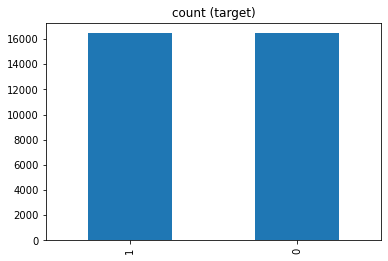

In [16]:
#oversampling
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)
test_over[5408].value_counts().plot(kind='bar', title='count (target)')

In [6]:
acc_svm = SVM(test_over,0.7)
print(acc_svm)

0.6208713272543059


In [4]:
from imblearn.over_sampling import SMOTE

In [6]:
size_train = int(0.7 * len(df))
#df_train, df_test = test_over.head(size_train), test_over.iloc[size_train:,:]
    
# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC()

df_train, df_test = df.head(size_train), df.iloc[size_train:,:]

X_train, y_train = df_train.iloc[:,:df_train.shape[1] - 1], df_train.iloc[:,df_train.shape[1] - 1]
X_test, y_test = df_test.iloc[:,:df_test.shape[1] - 1], df_test.iloc[:,df_test.shape[1] - 1]

over = SMOTE()
X_smote, y_smote = over.fit_resample(X_train, y_train)
# smote_count_1 = 0
# smote_count_0 = 0
# for i in y_smote:
#     if i == 1:
#         smote_count_1 += 1
#     elif i == 0:
#         smote_count_0 += 1
# print(smote_count_1, smote_count_0)

svc_model.fit(X_smote, y_smote)

svc_predict = svc_model.predict(X_test)# check performance

In [8]:
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))
print('precision:', precision_score(y_test, svc_predict))
print('recall:', recall_score(y_test, svc_predict))


ROCAUC score: 0.7391160453711225
Accuracy score: 0.9911611088790679
F1 score: 0.5416666666666666
precision: 0.6190476190476191
recall: 0.48148148148148145


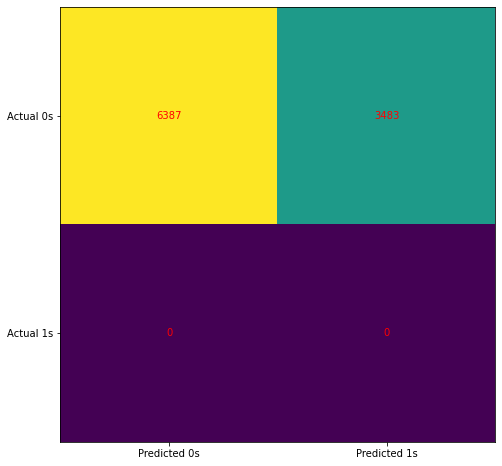

In [22]:
cm = confusion_matrix(y_test, svc_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [9]:
#penalized svm
size_train = int(0.7 * len(df))
df_train, df_test = df.head(size_train), df.iloc[size_train:,:]
    
# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)
X_train, y_train = df_train.iloc[:,:df_train.shape[1] - 1], df_train.iloc[:,df_train.shape[1] - 1]
X_test, y_test = df_test.iloc[:,:df_test.shape[1] - 1], df_test.iloc[:,df_test.shape[1] - 1]
svc_model.fit(X_smote, y_smote)

svc_predict = svc_model.predict(X_test)# check performance

In [26]:
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))
print('precision:', precision_score(y_test, svc_predict))
print('recall:', recall_score(y_test, svc_predict))

ROCAUC score: 0.738811414989319
Accuracy score: 0.9905584572117316
F1 score: 0.5252525252525252
precision: 0.5777777777777777
recall: 0.48148148148148145


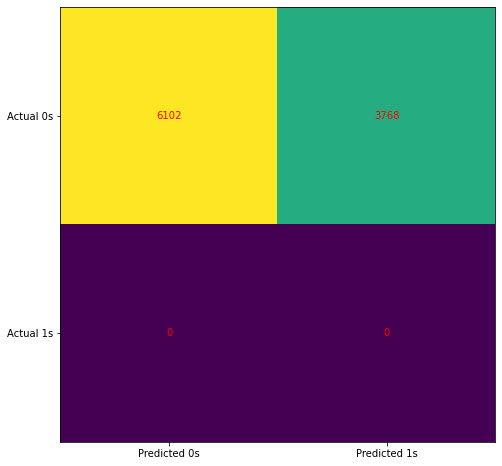

In [14]:
cm = confusion_matrix(y_test, svc_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [27]:
#SVM - random forest
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))
print('precision:', precision_score(y_test, rfc_predict))
print('recall:', recall_score(y_test, rfc_predict))
print()

ROCAUC score: 0.5551493817131511
Accuracy score: 0.9895540377661711
F1 score: 0.18750000000000003
precision: 0.6
recall: 0.1111111111111111



In [ ]:
fig = plt.figure(figsize=(100, 100))
plot_tree(rfc.estimators_[0], 
          feature_names=df.columns,
          class_names=["active","inactive"], 
          filled=True, impurity=True, 
          rounded=True)

fig.savefig('figure_name.png')